# Pipeline
The aim is to determine what path / logic we can follow in order to create some stories.

During the zoom call of November 7th. we determined that it would be more enjoyable to follow the following path:

## From movies to statistics !
We first have to define an "entry point", which could have been a name, a set of names, a movie or a set of movies.
Having a starting set of movies with computed in advance results seemed more enjoyable and a better story, since not all names would have reflected results (i.e putting a textbox for the user to enter his name would have lead to a lot of negative results -> not enjoyable)

So, the main idea is:
- Find a fix number of movies were we can clearly show an impact on some names (In order to make it as much interactive as possible, it would be nice to have at least 20-40 of them)
- Clicking on a movie would show information on the name, the country, etc... (time line with the bump clearly shown)

(This is for the interactive part, for the more static part were we just compute resutls, we can answer lots of question in addition to that)

## How do we find that ?

- Trying to test all the ~40000 entries would take way too much time -> we could try to keep only the top 50 by year according to the revenue.
- Once we have some movies, we have to find which of them has actually and impact -> extract the name of the characters of those movies
- For each extracted name, we can start the computation that are described in next section
- Once we have the data, we need to fine a way to determine if the result is good enough (TODO)
- Present those movies nicely and get some interactive features 

## Name distribution analysis
The names are distributed on a time-range and want we basically want to now is if the "trend" has changed around a specific date.
I found 2 main methods to do so:
### 1. Interrupted time series (ITS)
You define a date of interest, and only keep the data that happened before this point of time.
Then, you use a machine learning model that predicts how the distribution should have evolved in the following years.
Since you have the data, you can compare what was estimed by the model and what actually happend and thus see an impact or not of the point in time.

TODO: Find a way to measure how well this works -> quantify if the difference is big enough to make it valid

### 2. Slope analysis
This might need more research, but it's a more analystical approach where we study the slope change of the distribution and check wheter the movie is at a local minimum.


In [2]:
# Load the dataset with panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
PATH = 'data/raw/babyNamesUSYOB-full.csv'
df = pd.read_csv(PATH)

df.head()

,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


**Just an example of a name statistic**

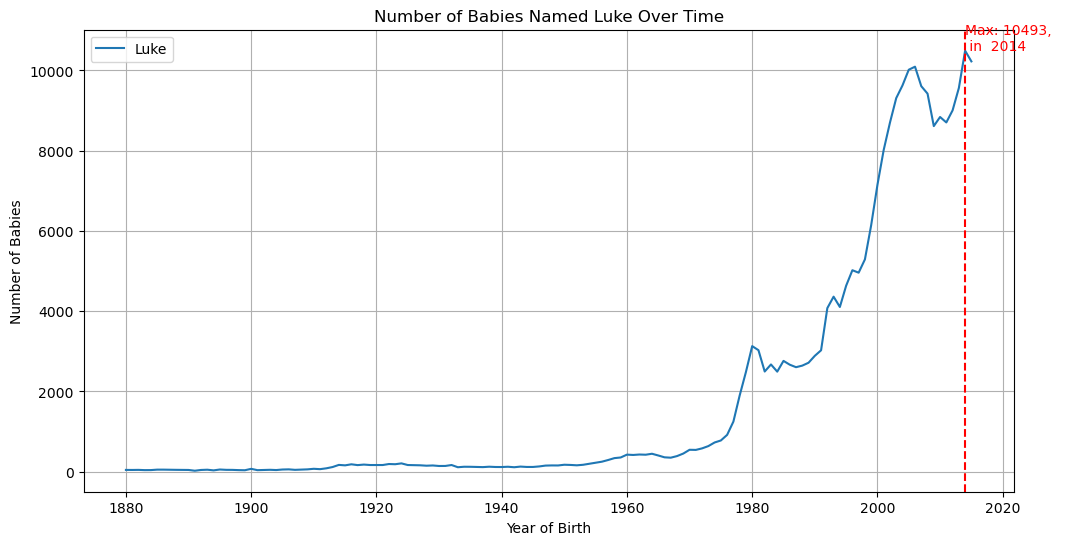

In [4]:
def stat_by_name(name, df):
    stat = df[df.Name == name].groupby('YearOfBirth').sum()
    # plot with x axis as year of birth (5 years interval)
    # plot with y axis as number of babies with that name
    # 1, label the axis
    # 2, add title
    # 3, add legend
    # 4, add grid
    # 5, make that the x axis increment is 5 years

    stat.index = stat.index.astype(int)
    ax = stat['Number'].plot(kind='line', figsize=(12, 6))
    ax.set_xlabel('Year of Birth')
    ax.set_ylabel('Number of Babies')
    ax.set_title(f'Number of Babies Named {name} Over Time')
    ax.legend([name])
    ax.grid(True)
    
    # Now we want to identify when there was a rise in the number of babies with that name
    # 1, find the year with the highest number of babies with that name
    # 2, add a vertical line at that year
    # 3, add a text annotation at that year
    max_year = stat['Number'].idxmax()
    max_value = stat['Number'].max()
    ax.axvline(x=max_year, color='r', linestyle='--')
    ax.text(max_year, max_value, f'Max: {max_value}, \n in  {max_year}', color='r')
    plt.show()



stat_by_name('Luke', df)